# Interest Rate Prediction

A little background on the case study. This data belongs to a loan aggregator agency which connects loan applications to different financial institutions in attempt to get the best interest rate. They want to now utilise past data to predict interest rate given by any financial institute just by looking at loan application characteristics.

To achieve that , they have decided to do a POC with a data from a particular financial institution. The data is given in the file "loans data.csv". Lets begin:

## Import required libraries

In [1]:
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import Dataset

In [2]:
df=pd.read_csv("loans data .csv")

## Data Exploration

In [3]:
#top 5 rows in dataset
df.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,81174.0,20000,20000,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14,14272,2.0,< 1 year
1,99592.0,19200,19200,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12,11140,1.0,2 years
2,80059.0,35000,35000,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14,21977,1.0,2 years
3,15825.0,10000,9975,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10,9346,0.0,5 years
4,33182.0,12000,12000,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11,14469,0.0,9 years


In [4]:
#shape of dataset
df.shape

(2500, 15)

In [5]:
#some statistics of data
df.describe()

,ID,Monthly.Income,Inquiries.in.the.Last.6.Months
count,2499.000000,2497.000000,2497.000000
mean,51643.325330,5689.716608,0.906688
std,30053.637661,3963.568002,1.231149
min,10.000000,588.500000,0.000000
25%,26570.500000,3500.000000,0.000000
50%,50673.000000,5000.000000,0.000000
75%,77583.000000,6800.000000,1.000000
max,104202.000000,102750.000000,9.000000


In [6]:
#count of null values in each column
df.isnull().sum()

ID                                 1
Amount.Requested                   1
Amount.Funded.By.Investors         1
Interest.Rate                      0
Loan.Length                        1
Loan.Purpose                       1
Debt.To.Income.Ratio               1
State                              1
Home.Ownership                     1
Monthly.Income                     3
FICO.Range                         0
Open.CREDIT.Lines                  4
Revolving.CREDIT.Balance           3
Inquiries.in.the.Last.6.Months     3
Employment.Length                 78
dtype: int64

In [7]:
#data type of each column

df.dtypes

ID                                float64
Amount.Requested                   object
Amount.Funded.By.Investors         object
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                  object
Revolving.CREDIT.Balance           object
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object

## Data Cleaning

You can see that Interest Rate column and Debt.To.Income.Ratio column contain "%" sign in their values and because of which they have come as character columns in the data. Lets remove these percentage sign first.

In [8]:
for col in ["Interest.Rate","Debt.To.Income.Ratio"]:
    df[col]=df[col].astype("str")
    df[col]=[x.replace("%","") for x in df[col]]

As there are many colums which are in object datatype, need to convert those columns from object to numbers

In [9]:
for col in ["Amount.Requested","Amount.Funded.By.Investors","Open.CREDIT.Lines","Revolving.CREDIT.Balance",
           "Inquiries.in.the.Last.6.Months","Interest.Rate","Debt.To.Income.Ratio"]:
    df[col]=pd.to_numeric(df[col],errors="coerce")

In [10]:
#check data types
df.dtypes

ID                                float64
Amount.Requested                  float64
Amount.Funded.By.Investors        float64
Interest.Rate                     float64
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio              float64
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object

###  loan length column:

In [11]:
df["Loan.Length"].value_counts()

36 months    1950
60 months     548
.               1
Name: Loan.Length, dtype: int64

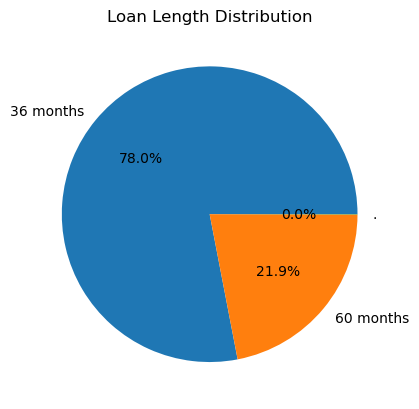

In [12]:
value_counts= df['Loan.Length'].value_counts()

# Create a pie chart
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')

# Add a title to the chart
plt.title('Loan Length Distribution')

# Display the chart
plt.show()

we can see that their is 2 main variables,one is 36 month and other is 60 month. They are depended on eachother. so we can create dummy variable between them.

In [13]:
ll_dummies=pd.get_dummies(df["Loan.Length"])

In [14]:
ll_dummies.head()

,.,36 months,60 months
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0


We'll add dummy variable for "36 months" to our data and ignore the rest two

In [15]:
df["LL_36"]=ll_dummies["36 months"]

Now that we have created dummies for Loan.Length, we need to remove old column from the dataframe




In [16]:
df=df.drop('Loan.Length',axis=1)


### Loan Purpose column:

In [17]:
df['Loan.Purpose'].value_counts()

debt_consolidation    1307
credit_card            444
other                  200
home_improvement       152
major_purchase         101
small_business          87
car                     50
wedding                 39
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: Loan.Purpose, dtype: int64

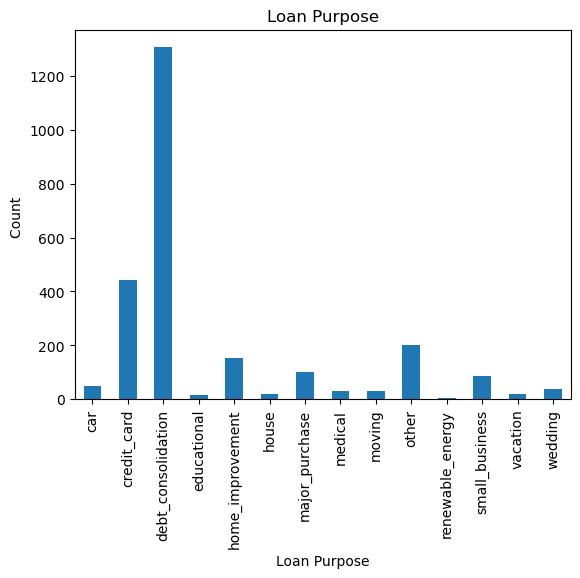

In [18]:
# Group the data by 'Loan.Purpose' and count the occurrences of each category
grouped_data = df.groupby('Loan.Purpose')['Interest.Rate'].count()

# Plotting the clustered column graph
fig, ax = plt.subplots()
grouped_data.plot(kind='bar', ax=ax)

# Customize the graph
ax.set_xlabel('Loan Purpose')
ax.set_ylabel('Count ')
ax.set_title('Loan Purpose')

# Show the graph
plt.show()

In loan purpose column,their are 14 unique variable.so we can not deal with them.so we compare them with interest rate column and we can club those categories for which average interest rates are similar.

In [19]:
round(df.groupby("Loan.Purpose")["Interest.Rate"].mean())

Loan.Purpose
car                   11.0
credit_card           13.0
debt_consolidation    14.0
educational           11.0
home_improvement      12.0
house                 13.0
major_purchase        11.0
medical               12.0
moving                14.0
other                 13.0
renewable_energy      10.0
small_business        13.0
vacation              12.0
wedding               12.0
Name: Interest.Rate, dtype: float64

From above table we can see that their are some variables with same mean.so we can club them.

In [20]:
for i in range(len(df.index)):
    if df["Loan.Purpose"][i] in ["car","educational","major_purchase"]:
        df.loc[i,"Loan.Purpose"]="cem"
    if df["Loan.Purpose"][i] in ["home_improvement","medical","vacation","wedding"]:
        df.loc[i,"Loan.Purpose"]="hmvw"
    if df["Loan.Purpose"][i] in ["credit_card","house","other","small_business"]:
        df.loc[i,"Loan.Purpose"]="chos"
    if df["Loan.Purpose"][i] in ["debt_consolidation","moving"]:
        df.loc[i,"Loan.Purpose"]="dm"

In [21]:
#now we make dummies for these variable
lp_dummies=pd.get_dummies(df["Loan.Purpose"],prefix="LP")

In [22]:
lp_dummies.head()

,LP_cem,LP_chos,LP_dm,LP_hmvw,LP_renewable_energy
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,1,0,0,0


In [23]:
#we will add this data in original table and then drop "loan purpose" column and LP_renewable_energy
df=pd.concat([df,lp_dummies],1)
df=df.drop(["Loan.Purpose","LP_renewable_energy"],1)

C:\Users\d\AppData\Local\Temp\ipykernel_36128\1782761590.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df=pd.concat([df,lp_dummies],1)
C:\Users\d\AppData\Local\Temp\ipykernel_36128\1782761590.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=df.drop(["Loan.Purpose","LP_renewable_energy"],1)


### state column:

In [24]:
df["State"].value_counts()

CA    433
NY    255
TX    174
FL    169
IL    101
GA     97
PA     96
NJ     94
VA     78
MA     73
OH     71
MD     68
NC     64
CO     61
WA     58
CT     50
AZ     46
MI     45
MN     38
AL     38
MO     33
NV     32
OR     30
SC     28
WI     26
KY     23
LA     22
OK     21
KS     21
UT     16
NH     15
RI     15
WV     14
AR     13
NM     13
HI     12
AK     11
DC     11
DE      8
MT      7
VT      5
SD      4
WY      4
IN      3
IA      1
.       1
MS      1
Name: State, dtype: int64

In [25]:
df["State"].nunique()

47

In [26]:
#unique state
df["State"].unique()

array(['SC', 'TX', 'CA', 'KS', 'NJ', 'CT', 'MA', 'LA', 'FL', 'DC', 'OH',
       'AL', 'AZ', 'GA', 'WV', 'NH', 'VA', 'NY', 'MD', 'HI', 'PA', 'WA',
       'IL', 'NC', 'WI', 'SD', 'AK', 'DE', 'MN', 'MO', 'RI', 'CO', 'NM',
       'MI', 'OK', 'NV', 'UT', 'AR', 'KY', 'VT', 'OR', 'IA', '.', 'MT',
       'IN', nan, 'WY', 'MS'], dtype=object)

we can club them in region wise like east,west,sothern states etc.

In [27]:
df.loc[df["State"].isin(["CA", "WA", "OR","AK"]), "State"] = "west"
df.loc[df["State"].isin(["NY", "FL", "NJ", "VA","MA","MD","NC","WI","RI","DE","CT","MI",
                         "SC","PA","NH","WV","DC","VT"]), "State"] = "east"
df.loc[df["State"].isin(["TX", "GA", "AL", "LA","KY","KS","OK","UT","AR","NM","HI","MS"]), "State"] = "southern_states"
df.loc[df["State"].isin(["IL","OH","CO","MN","MO","NV","IA","IN"]), "State"] = "midwest"
df.loc[df["State"].isin(["AZ","MT","WY","SD"]), "State"] = "mountain_states"

In [28]:
df["State"].value_counts()

east               1114
west                532
southern_states     451
midwest             340
mountain_states      61
.                     1
Name: State, dtype: int64

In [29]:
#now we make dummies for these variables
states_dummies=pd.get_dummies(df["State"],prefix="State")

In [30]:
states_dummies.head()

,State_.,State_east,State_midwest,State_mountain_states,State_southern_states,State_west
0,0,1,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,0,1,0
4,0,1,0,0,0,0


In [31]:
#we will add this data in original table and then drop "State" column and "State_."
df=pd.concat([df,states_dummies],1)
df=df.drop(["State","State_."],1)

C:\Users\d\AppData\Local\Temp\ipykernel_36128\539845160.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df=pd.concat([df,states_dummies],1)
C:\Users\d\AppData\Local\Temp\ipykernel_36128\539845160.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=df.drop(["State","State_."],1)


### Home ownership column:

In [32]:
df['Home.Ownership'].value_counts()

MORTGAGE    1147
RENT        1146
OWN          200
OTHER          5
NONE           1
Name: Home.Ownership, dtype: int64

Here, we have 5 categories , In this, OTHER and NONE have less quantities so we can ignore them and considered that there are only 3 categories and created only two dummies

In [33]:
df["ho_mort"]=np.where(df["Home.Ownership"]=="MORTGAGE",1,0)
df["ho_rent"]=np.where(df["Home.Ownership"]=="RENT",1,0)

In [34]:
# drop original home ownership column
df=df.drop(["Home.Ownership"],1)

C:\Users\d\AppData\Local\Temp\ipykernel_36128\4022167835.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=df.drop(["Home.Ownership"],1)


In [35]:
df.dtypes

ID                                float64
Amount.Requested                  float64
Amount.Funded.By.Investors        float64
Interest.Rate                     float64
Debt.To.Income.Ratio              float64
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
LL_36                               uint8
LP_cem                              uint8
LP_chos                             uint8
LP_dm                               uint8
LP_hmvw                             uint8
State_east                          uint8
State_midwest                       uint8
State_mountain_states               uint8
State_southern_states               uint8
State_west                          uint8
ho_mort                             int32
ho_rent                             int32
dtype: object

### Fico range column:

In [36]:
df['FICO.Range'].head()

0    735-739
1    715-719
2    690-694
3    695-699
4    695-699
Name: FICO.Range, dtype: object

If you look at first few values of variable FICO.Range , you can see that we can convert it to numeric by taking average of the range given. To do that first we need to split the column with "-", so that we can have both end of ranges in separate columns and then we can simply average them. Lets first split

In [37]:
df['f1'], df['f2'] = zip(*df['FICO.Range'].apply(lambda x: x.split('-', 1)))

Now we create new variable "fico" by averaging f1 and f2.

In [38]:
df["fico"]=0.5*(pd.to_numeric(df["f1"])+pd.to_numeric(df["f2"]))

we'll drop the original variable FICO.Range and f1,f2.

In [39]:
df=df.drop(["FICO.Range","f1","f2"],1)

C:\Users\d\AppData\Local\Temp\ipykernel_36128\549618318.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=df.drop(["FICO.Range","f1","f2"],1)


### Employment length column:

In [40]:
df["Employment.Length"].value_counts()

10+ years    653
< 1 year     249
2 years      243
3 years      235
5 years      202
4 years      191
1 year       177
6 years      163
7 years      127
8 years      108
9 years       72
.              2
Name: Employment.Length, dtype: int64

In [41]:
# Replace year and years with space("") in employment length column
df["Employment.Length"]=df["Employment.Length"].astype("str")
df["Employment.Length"]=[x.replace("years","") for x in df["Employment.Length"]]
df["Employment.Length"]=[x.replace("year","") for x in df["Employment.Length"]]

In [42]:
df["Employment.Length"].value_counts()

10+     653
< 1     249
2       243
3       235
5       202
4       191
1       177
6       163
7       127
8       108
nan      78
9        72
.         2
Name: Employment.Length, dtype: int64

We can convert everything else to numbers , but "n/a" are a problem. We can look at average interest rate across all values of Employment.Length and then replace "n/a" with value which has closet average response.

In [43]:
round(df.groupby("Employment.Length")["Interest.Rate"].mean(),2)

Employment.Length
.       11.34
1       12.49
10+     13.34
2       12.87
3       12.77
4       13.14
5       13.40
6       13.29
7       13.10
8       13.01
9       13.15
< 1     12.86
nan     12.78
Name: Interest.Rate, dtype: float64

As you can see average interest rate of "n/a" is similar to "< 1".

In [44]:
df["Employment.Length"]=[x.replace("n/a","< 1") for x in df["Employment.Length"]]
df["Employment.Length"]=[x.replace("10+","10") for x in df["Employment.Length"]]
df["Employment.Length"]=[x.replace("< 1","0") for x in df["Employment.Length"]]
df["Employment.Length"]=pd.to_numeric(df["Employment.Length"],errors="coerce")

In [45]:
df.dtypes

ID                                float64
Amount.Requested                  float64
Amount.Funded.By.Investors        float64
Interest.Rate                     float64
Debt.To.Income.Ratio              float64
Monthly.Income                    float64
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                 float64
LL_36                               uint8
LP_cem                              uint8
LP_chos                             uint8
LP_dm                               uint8
LP_hmvw                             uint8
State_east                          uint8
State_midwest                       uint8
State_mountain_states               uint8
State_southern_states               uint8
State_west                          uint8
ho_mort                             int32
ho_rent                             int32
fico                              float64
dtype: object

now we have all columns in numerical form

In [46]:
df.shape

(2500, 23)

In [47]:
# drop rows which have missing values
df.dropna(axis=0,inplace=True)

In [48]:
df.shape

(2394, 23)

## Train test split:

We now split our data into two random parts one is training data and another is test data. we build model on training data and evaluate on test data.

In [49]:
df_train, df_test = train_test_split(df, test_size = 0.2,random_state=2)

## Linear Regression model:

In [50]:
#create object of linear regression model
lm=LinearRegression()

Now we'll separate predictor and response for both the datasets . We'll also drop ID from predictor's list because it doesnt make sense to include an ID variable in the model. Variable "Amount.Funded.By.Investors" will also be dropped because it wont be available until the loan has been processed. We can use only those variables which are present at the point of the business process where we want to apply our model.

In [51]:
x_train=df_train.drop(["Interest.Rate","ID","Amount.Funded.By.Investors"],1)
y_train=df_train["Interest.Rate"]
x_test=df_test.drop(["Interest.Rate","ID","Amount.Funded.By.Investors"],1)
y_test=df_test["Interest.Rate"]

C:\Users\d\AppData\Local\Temp\ipykernel_36128\2968121152.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train=df_train.drop(["Interest.Rate","ID","Amount.Funded.By.Investors"],1)
C:\Users\d\AppData\Local\Temp\ipykernel_36128\2968121152.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_test=df_test.drop(["Interest.Rate","ID","Amount.Funded.By.Investors"],1)


## Model Building:

Now we can fit our model using lm the LinearRegression object that we created earlier

In [52]:
lm.fit(x_train,y_train)

LinearRegression()

## Model Evaluation

Next we predict resposne on our test data , calculate errors on those prediction and then rmse for those residuals. That is the measure of performance on the test data.

In [53]:
p_test=lm.predict(x_test)

residual=p_test-y_test

rmse_lm=np.sqrt(np.dot(residual,residual)/len(p_test))

print("Root Mean Square Error=",rmse_lm)

Root Mean Square Error= 1.9906107600279253


This can use to compare our linear regression model with other techniques and eventualy pick the one with least error . 

Next we show how to extract coefficient produced by our model

In [54]:
coefs=lm.coef_

features=x_train.columns

list(zip(features,coefs))

[('Amount.Requested', 0.0001515771132449319),
 ('Debt.To.Income.Ratio', 0.0011689765249616338),
 ('Monthly.Income', -1.4294654347333076e-05),
 ('Open.CREDIT.Lines', -0.02769260879401699),
 ('Revolving.CREDIT.Balance', -4.120325493568392e-06),
 ('Inquiries.in.the.Last.6.Months', 0.3677216193807099),
 ('Employment.Length', 0.0059131849837354596),
 ('LL_36', -3.2345605072155057),
 ('LP_cem', -1.2626244434573681),
 ('LP_chos', -1.378457749650042),
 ('LP_dm', -1.4413963653758286),
 ('LP_hmvw', -1.60205206142783),
 ('State_east', -0.07754090383844259),
 ('State_midwest', -0.26369176610545714),
 ('State_mountain_states', 0.1481682891510277),
 ('State_southern_states', 0.23110583832276355),
 ('State_west', -0.038041457529888474),
 ('ho_mort', -0.4500965855652212),
 ('ho_rent', -0.13991908586255755),
 ('fico', -0.08652231400781855)]

### Feacture Importance Graph

A horizontal bar plot where the features are shown on the y-axis, and the coefficients are displayed on the x-axis.The length of the bars indicates the magnitude of the coefficients, providing a visual representation of the importance or impact of each feature in the linear regression model.

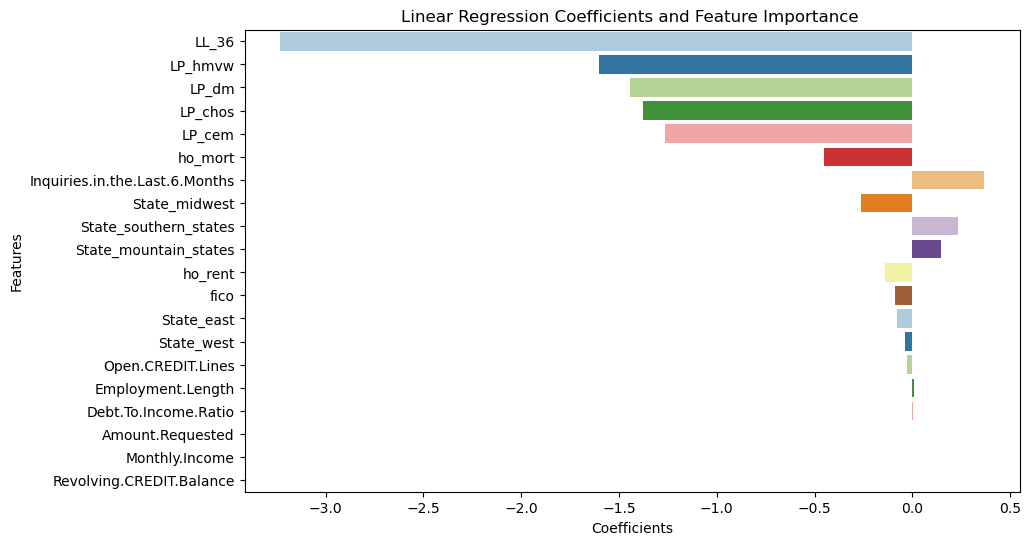

In [55]:
# Extracting feature names and coefficients
features, coefs = zip(*list(zip(features, coefs)))

# Create a DataFrame to store the features and coefficients
df = pd.DataFrame({'Features': features, 'Coefficients': coefs})

# Sort the DataFrame by absolute coefficient values for better visualization
df['Abs_Coefficients'] = abs(df['Coefficients'])
df = df.sort_values('Abs_Coefficients', ascending=False)

# Plot the coefficients using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficients', y='Features', data=df, orient='h',palette='Paired')
plt.xlabel('Coefficients')
plt.ylabel('Features')
plt.title('Linear Regression Coefficients and Feature Importance ')
plt.show()

### Scatter plot of actual interest rate vs predicted interest rate

Actual vs. Predicted Plot: To visually compare the actual interest rates and the predicted interest rates, a scatter plot with the actual interest rates on the x-axis and the predicted interest rates on the y-axis. This plot helps to assess the model's accuracy. The scatter plot will also include a diagonal line (dashed red line) that represents perfect predictions, i.e., where the predicted interest rate is exactly equal to the actual interest rate. Points closer to this line indicate more accurate predictions.

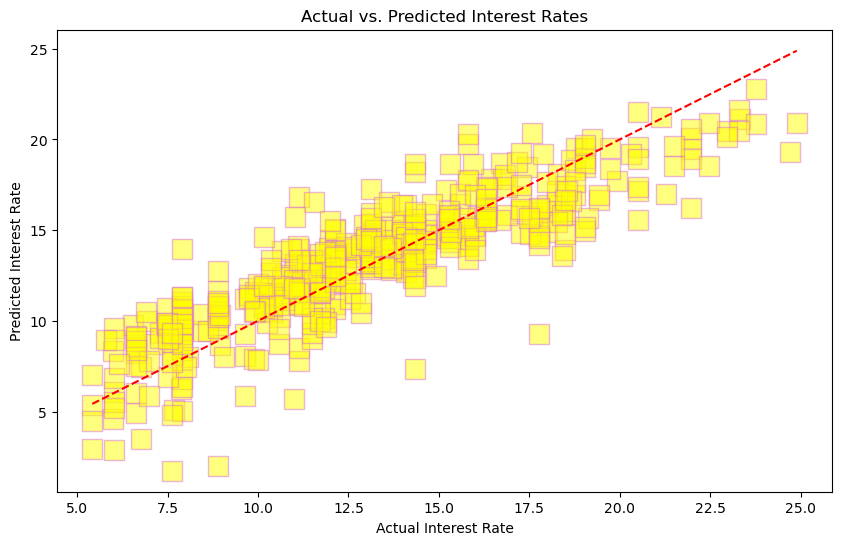

In [56]:
# Creating a scatter plot of actual vs. predicted interest rates
plt.figure(figsize=(10, 6))
plt.scatter(y_test, p_test, alpha=0.5, marker="s", edgecolor="orchid", s=200, c="yellow")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Interest Rate')
plt.ylabel('Predicted Interest Rate')
plt.title('Actual vs. Predicted Interest Rates')
plt.show()